# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [5]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [6]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)

In [7]:
feat_df <- read.table("../../output/cellNorm_one_way_ANOVA/simple_one_wayANOVA_hMinImp_cellNorm_groupFil0.3_HILICpos_fullreport.csv"
        ,row.names = 1, header = TRUE, sep = ',')

In [8]:
head(feat_df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Naive_percNA,Naive_mean,R5neg_percNA,R5neg_mean,R5pos_percNA,R5pos_mean,gMean_Naive,gMean_R5neg,gMean_R5pos,log2FC_R5negvsNaive,log2FC_R5posvsNaive,log2FC_R5posvsR5neg,f_score,pval,padj,Tpadj_R5neg.Naive,Tpadj_R5pos.Naive,Tpadj_R5pos.R5neg,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,85.0044,26.00,19.67,28.11,0,2003055,0.96,0.93,106,23,0.0000000,70477.00,0,118403.5,0.3333333,33095.50,15.91038,15.56874,15.07132,-0.3416397,-0.8390586,-0.4974189,0.6633234,5.492094e-01,0.5992622462,0.8891567450,0.524063422,7.837505e-01,14.75765,16.52419,16.44929,15.64991,15.73690,15.31941,13.75765,16.00143,15.45488,16.25446,16.29809,16.52315
F100,130.9851,25.74,19.67,28.89,1936,3512837,1.00,0.97,217,24,0.0000000,150293.00,0,141202.2,0.0000000,140867.67,17.08157,15.82404,16.68579,-1.2575313,-0.3957843,0.8617471,0.3667367,7.075161e-01,0.7384392506,0.6954972259,0.962661078,8.384890e-01,17.60134,17.42220,16.22119,15.98205,15.93704,15.55304,13.12585,18.31586,18.61565,17.66144,17.55834,17.36552
F10000,393.2598,422.45,419.56,429.02,8551,3235844,1.00,0.90,148,17,0.0000000,58362.33,1,NA,0.0000000,127009.33,15.82286,13.16461,17.77683,-2.6582562,1.9539617,4.6122179,69.7260225,7.019307e-05,0.0003564284,0.0012265286,0.005972804,5.623715e-05,16.00952,15.86099,15.59808,13.16461,13.16461,13.16461,18.15472,16.85217,18.32359,19.59158,16.12541,14.16461
F10004,393.2680,482.62,478.42,487.62,8553,1092807,0.91,0.97,51,11,0.6666667,119684.00,1,NA,0.0000000,157185.67,15.58330,14.94052,18.11705,-0.6427836,2.5337509,3.1765344,16.2982521,3.756729e-03,0.0073322486,0.5523560280,0.011970521,4.010203e-03,14.94052,14.94052,16.86887,14.94052,14.94052,14.94052,18.17618,17.52588,18.64910,16.32349,15.94052,15.99033
F10006,409.2267,310.52,291.08,330.49,8979,10810474,1.00,0.95,161,24,0.0000000,573708.67,0,527570.3,0.0000000,420937.67,19.11484,17.72225,19.56710,-1.3925945,0.4522532,1.8448477,65.6370762,8.350019e-05,0.0003935450,0.0004075358,0.079745275,8.316166e-05,18.82727,19.33012,19.18714,17.83219,17.71720,17.61735,19.80364,19.37064,19.52701,17.48562,18.17996,18.92816
F10007,409.2267,348.62,344.16,364.12,8979,2149563,1.00,0.90,69,24,0.0000000,17758.00,0,23847.5,0.0000000,19529.67,14.07900,13.14719,14.99002,-0.9318039,0.9110276,1.8428315,6.3420846,3.311558e-02,0.0517579007,0.2475244610,0.260078640,2.763169e-02,14.20953,14.40873,13.61873,13.68497,12.38662,13.36999,14.18547,15.08910,15.69550,17.59065,16.99836,17.16847


In [9]:
meta_df <- read.table("../../input/sequence_file/clean_deduplicated_meta_df.csv",
                     header = TRUE, sep = ',', row.names = 1)

In [10]:
head(meta_df,5)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687


In [11]:
sample_names = colnames(feat_df)[grepl('Naive\\_[0-9]+|R5pos\\_[0-9]+|R5neg\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "Naive_1" "Naive_2" "Naive_3" "R5neg_1" "R5neg_2" "R5neg_3" "R5pos_1"
[8] "R5pos_2" "R5pos_3"

[1] 9

[1] "padj"              "Tpadj_R5neg.Naive" "Tpadj_R5pos.Naive"
[4] "Tpadj_R5pos.R5neg"

In [12]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

# Define filtering level - FDR control

In [13]:
filtered_level = 0.01
feat_df.filt = feat_df[feat_df$padj < filtered_level & !is.na(feat_df$padj),]

In [14]:
dim(feat_df.filt)

[1] 2331   40

## subset datatable with only data values

In [15]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [16]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [17]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -2.012099  2.153021

#### columns and rows annotation

In [18]:
colnames(meta_df)

[1] "class"              "biological_samples" "cell_number"

In [19]:
unique(meta_df$class)

[1] "Naive" "R5neg" "R5pos"

## Since the metadata is not exclusively the data 

In [20]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [21]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'class') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [22]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'class')

In [23]:
annotation_col = data.frame(class = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [24]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [25]:
annotation_col$class

[1] "Naive" "Naive" "Naive" "R5neg" "R5neg" "R5neg" "R5pos" "R5pos" "R5pos"

#### Annotation of rows (here don't have these)

In [26]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [27]:
class = c("#888888","#0000ff","#ff0000")
names(class) = c("Naive","R5pos","R5neg")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [28]:
ann_colors = list(class = class)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [29]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -2.012099  2.153021

In [30]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2

In [31]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -2  2

In [32]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [33]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [34]:
out_dir = "../../output/cellNorm_one_way_ANOVA/heatmap/"
dir.create(out_dir)

exp_label = 'oneway_ANOVA_hMinImp_cellNorm_groupFil0.3_HILICpos'
out_pdf_file = file.path(out_dir, glue("{exp_label}_padj{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../output/cellNorm_one_way_ANOVA/heatmap' already exists”


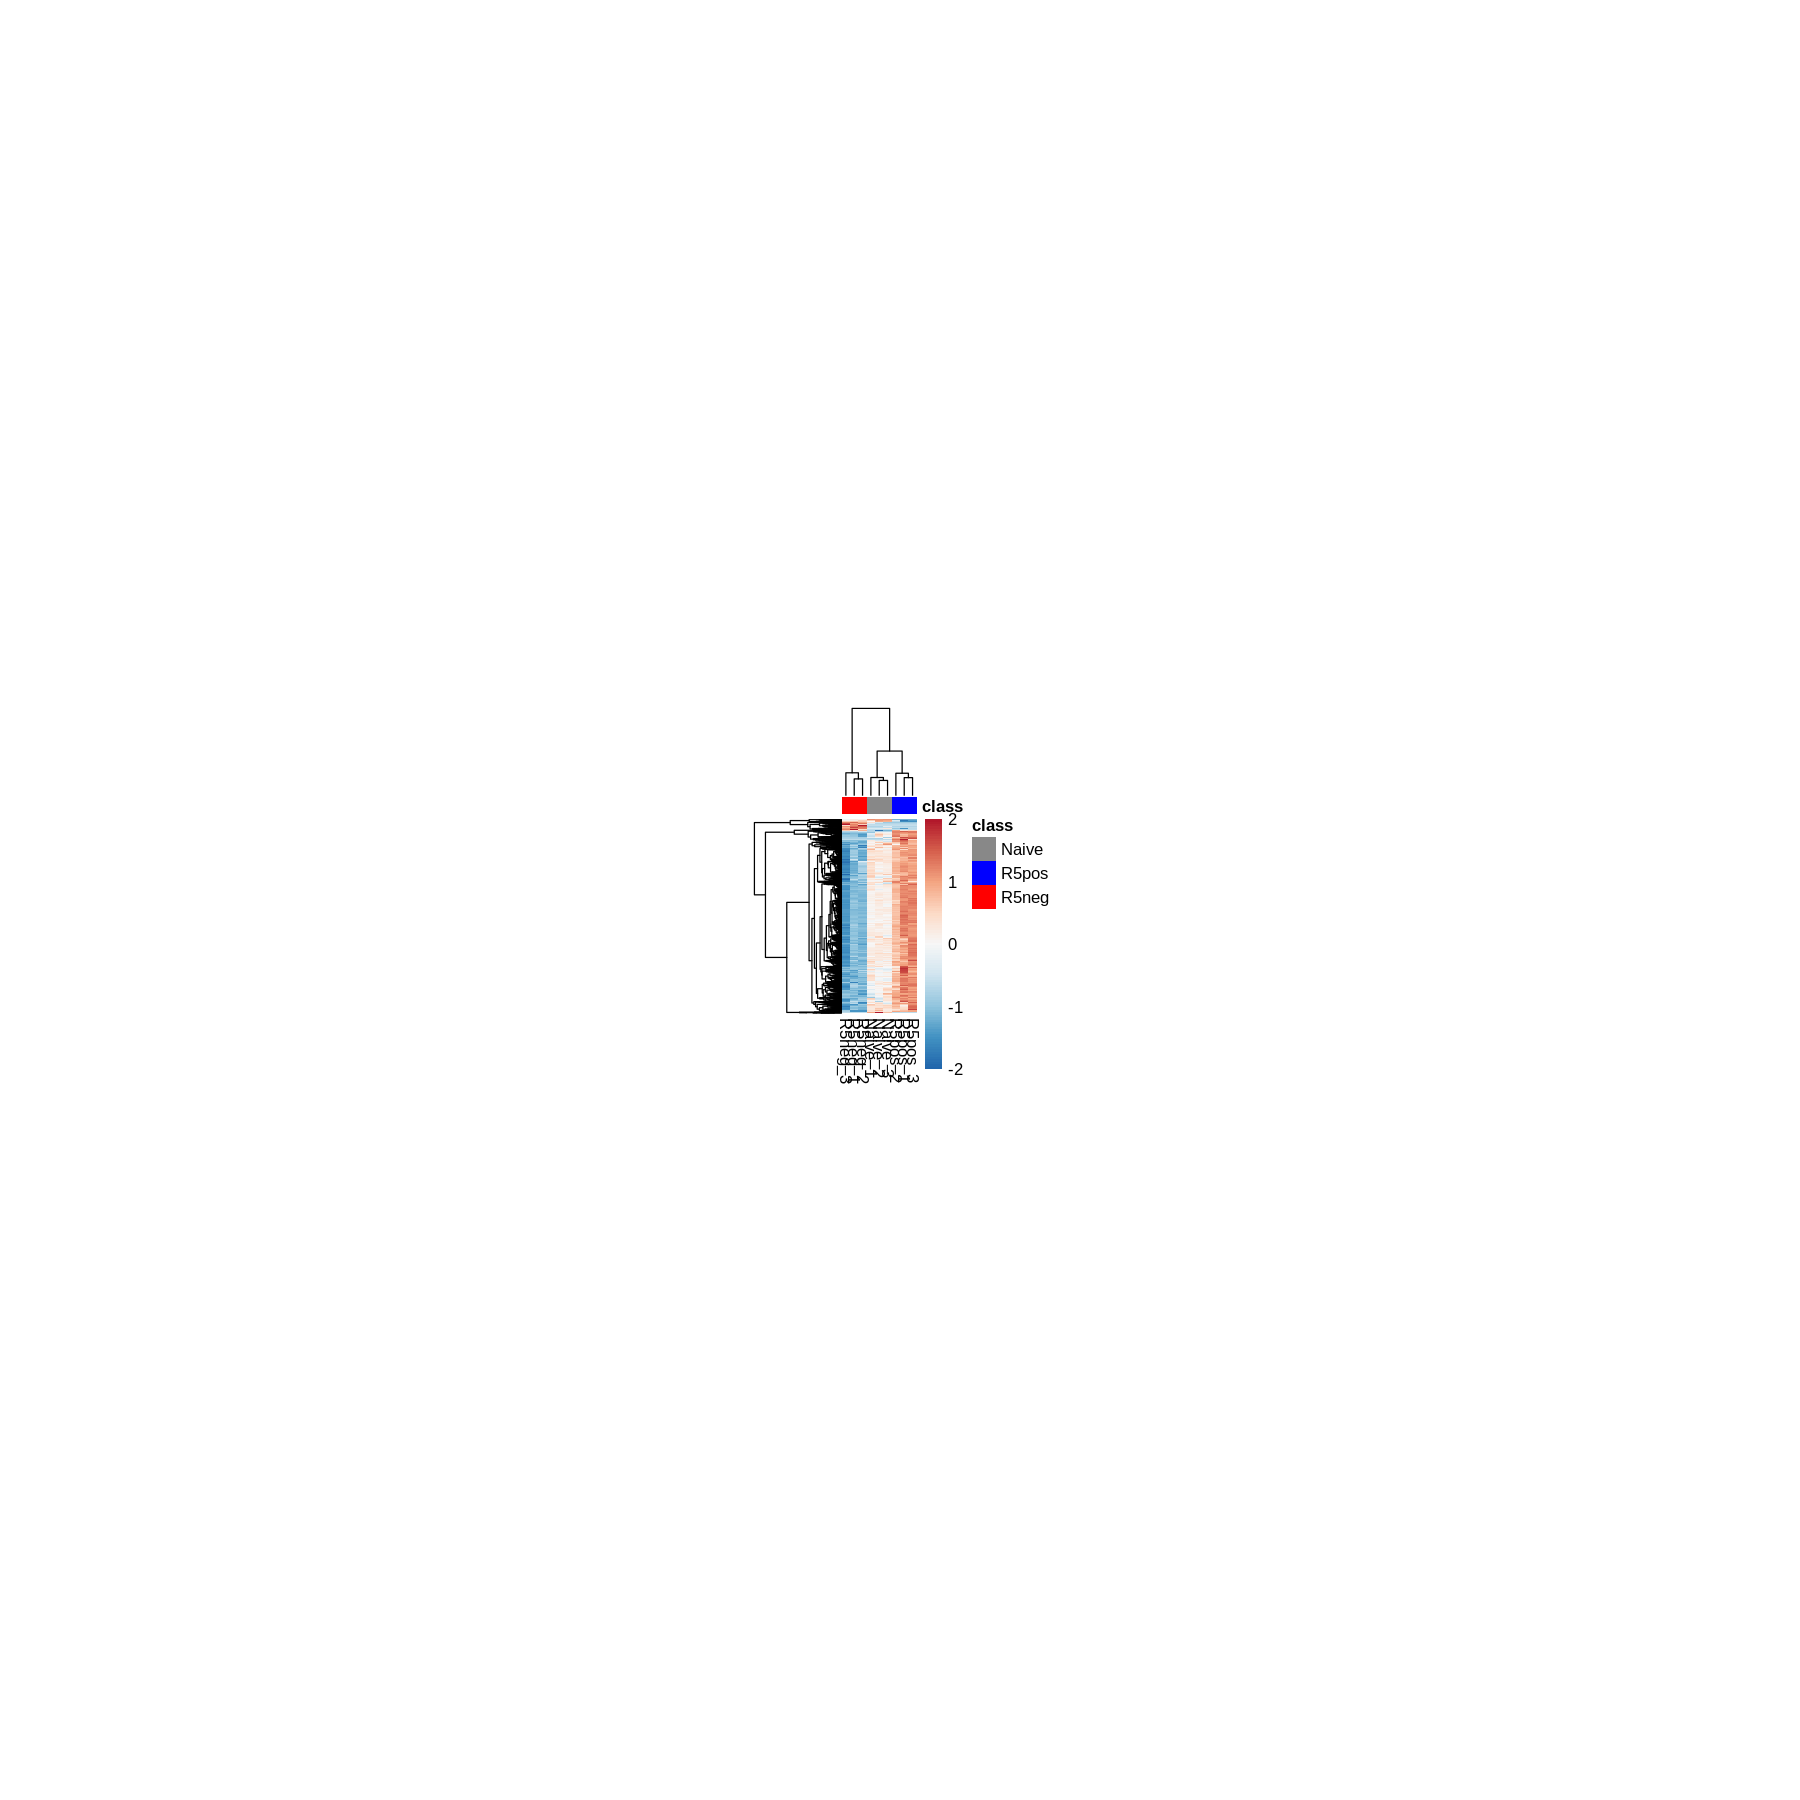

In [35]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = FALSE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 5,
         cellheight = 0.05,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----